In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


data = pd.read_csv("https://raw.githubusercontent.com/PacktWorkshops/The-Data-Analysis-Workshop/master/Chapter02/data/Absenteeism_at_work.csv", sep=';')

In [4]:
#print dimentionality, columns, types, and missing values

print(f'data dimentions: {data.shape}')

for col in data.columns:
    print(f'column: {col:35} | type: {str(data[col].dtype):7} | missing values: {data[col].isnull().sum():3d}')

data dimentions: (740, 21)
column: ID                                  | type: int64   | missing values:   0
column: Reason for absence                  | type: int64   | missing values:   0
column: Month of absence                    | type: int64   | missing values:   0
column: Day of the week                     | type: int64   | missing values:   0
column: Seasons                             | type: int64   | missing values:   0
column: Transportation expense              | type: int64   | missing values:   0
column: Distance from Residence to Work     | type: int64   | missing values:   0
column: Service time                        | type: int64   | missing values:   0
column: Age                                 | type: int64   | missing values:   0
column: Work load Average/day               | type: float64 | missing values:   0
column: Hit target                          | type: int64   | missing values:   0
column: Disciplinary failure                | type: int64   | missing v

In [5]:
# get statistics on numerical data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,740.0,18.017568,11.021247,1.000,9.000,18.000,28.000,36.000
Reason for absence,740.0,19.216216,8.433406,0.000,13.000,23.000,26.000,28.000
Month of absence,740.0,6.324324,3.436287,0.000,3.000,6.000,9.000,12.000
Day of the week,740.0,3.914865,1.421675,2.000,3.000,4.000,5.000,6.000
Seasons,740.0,2.544595,1.111831,1.000,2.000,3.000,4.000,4.000
Transportation expense,740.0,221.329730,66.952223,118.000,179.000,225.000,260.000,388.000
Distance from Residence to Work,740.0,29.631081,14.836788,5.000,16.000,26.000,50.000,52.000
Service time,740.0,12.554054,4.384873,1.000,9.000,13.000,16.000,29.000
Age,740.0,36.450000,6.478772,27.000,31.000,37.000,40.000,58.000
Work load Average/day,740.0,271.490235,39.058116,205.917,244.387,264.249,294.217,378.884


In [6]:
# define incoding dictunaries
month_en = {1:"January",2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",10:"October",11:"November",12:"December", 0:"Unknown"}
day_en = {2:"Monday",3:"Tuesday",4:"Wednesday",5:"Thursday",6:"Friday",7:"Saturday",1:"Sunday"}
season_en = {1:"Spring",2:"Summer",3:"Fall",4:"Winter"}
education_en = {1:"high school",2:"graduate",3:"postgraduate",4:"master_phd"}
yes_no_en = {0:"No",1:"Yes"}

In [7]:
# transform numerical variables to catagorical
pp_data = data.copy()
pp_data['Month of absence'] = pp_data['Month of absence'].apply(lambda x: month_en[x])
pp_data['Day of the week'] = pp_data['Day of the week'].apply(lambda x: day_en[x])
pp_data['Seasons'] = pp_data['Seasons'].apply(lambda x: season_en[x])
pp_data['Education'] = pp_data['Education'].apply(lambda x: education_en[x])
pp_data['Disciplinary failure'] = pp_data['Disciplinary failure'].apply(lambda x: yes_no_en[x])
pp_data['Social drinker'] = pp_data['Social drinker'].apply(lambda x: yes_no_en[x])
pp_data['Social smoker'] = pp_data['Social smoker'].apply(lambda x: yes_no_en[x])
pp_data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,July,Tuesday,Spring,289,36,13,33,239.554,...,No,high school,2,Yes,No,1,90,172,30,4
1,36,0,July,Tuesday,Spring,118,13,18,50,239.554,...,Yes,high school,1,Yes,No,0,98,178,31,0
2,3,23,July,Wednesday,Spring,179,51,18,38,239.554,...,No,high school,0,Yes,No,0,89,170,31,2
3,7,7,July,Thursday,Spring,279,5,14,39,239.554,...,No,high school,2,Yes,Yes,0,68,168,24,4
4,11,23,July,Thursday,Spring,289,36,13,33,239.554,...,No,high school,2,Yes,No,1,90,172,30,2


In [8]:
#define a function which checks if the ineger value is in the ICD or not
def in_icd(var):
    return "Yes" if var >= 1 and var <= 21 else "No"

In [9]:
# add Disease column
pp_data['Disease'] = pp_data['Reason for absence'].apply(in_icd)

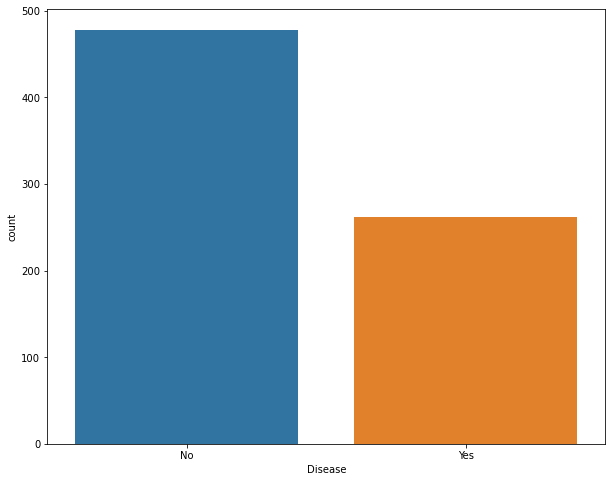

In [10]:
#plot the count of absences by diseas
plt.figure(figsize=(10,8))
sns.countplot(data=pp_data, x='Disease')
plt.savefig('disease_plot.png', format='png')

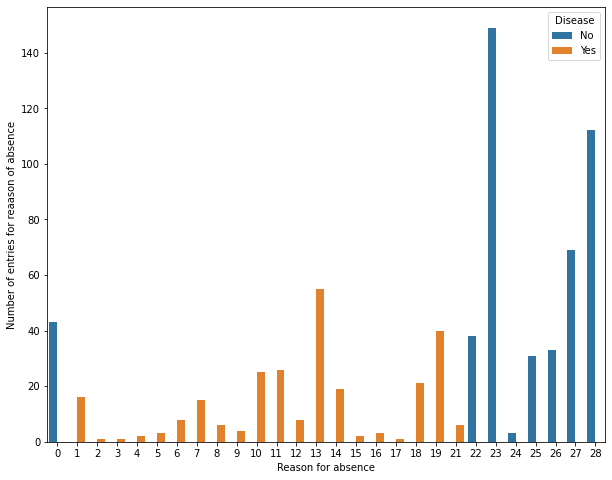

In [11]:
#plot the count of absences by reason of absence
plt.figure(figsize=(10,8))
ax = sns.countplot(data=pp_data, x='Reason for absence', hue='Disease')
ax.set_ylabel('Number of entries for reaason of absence')
plt.savefig('Reason_for_absence.png',format='png')

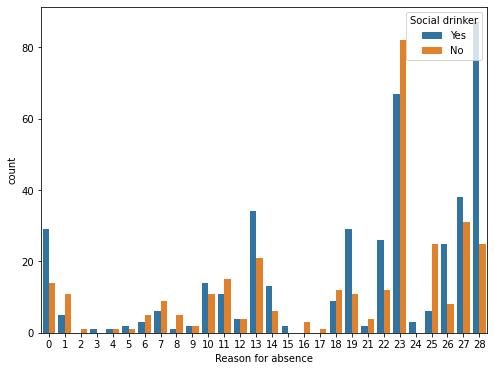

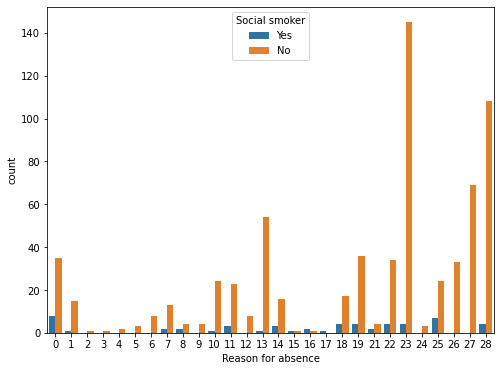

In [12]:
#plot the count of absences by reason of absence for social smokers and drinkers
plt.figure(figsize=(8,6))
sns.countplot(data=pp_data, x='Reason for absence', hue='Social drinker', hue_order=['Yes', 'No'])
plt.savefig('absence_reason__drinkers', format='png')

plt.figure(figsize=(8,6))
sns.countplot(data=pp_data, x='Reason for absence', hue='Social smoker', hue_order=['Yes', 'No'])
plt.savefig('absence_reason__smokers', format='png')

In [13]:
#compute probability of being a smoker or a drinker
drinker_prob = pp_data['Social drinker'].value_counts(normalize=True)['Yes']
smoker_prob = pp_data['Social smoker'].value_counts(normalize=True)['Yes']
print(f'P(social drinker):{drinker_prob:.04f} | P(social smoker): {smoker_prob:.04f}')

P(social drinker):0.5676 | P(social smoker): 0.0730


In [14]:
#create a mask for social drinkers/smokers
drinker_mask = pp_data['Social drinker'] == 'Yes'
smoker_mask = pp_data['Social smoker'] == 'Yes'
total_entries = pp_data.shape[0]

In [15]:
absence_drinker_prob = pp_data['Reason for absence'][drinker_mask].value_counts()/total_entries
absence_smoker_prob = pp_data['Reason for absence'][smoker_mask].value_counts()/total_entries

In [16]:
#compute conditional probabilities
cond_prob = pd.DataFrame(index=range(0,29))
cond_prob['p(Absence | social drinker)'] = absence_drinker_prob/drinker_prob
cond_prob['p(Absence | social smoker)'] = absence_smoker_prob/smoker_prob

<Figure size 432x288 with 0 Axes>

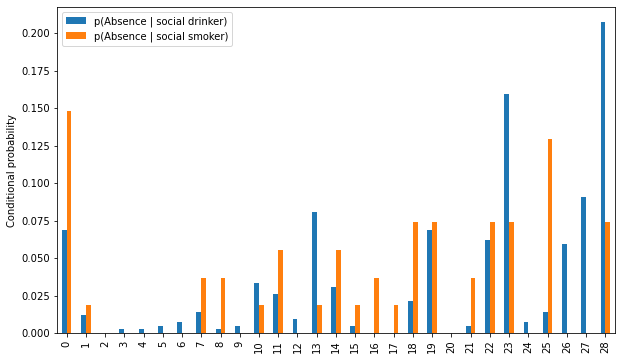

In [17]:
# plot conditional probabilities
plt.figure()
ax = cond_prob.plot.bar(figsize=(10,6))
ax.set_ylabel('Conditional probability')
plt.savefig('Conditional_probability.png')

<Figure size 432x288 with 0 Axes>

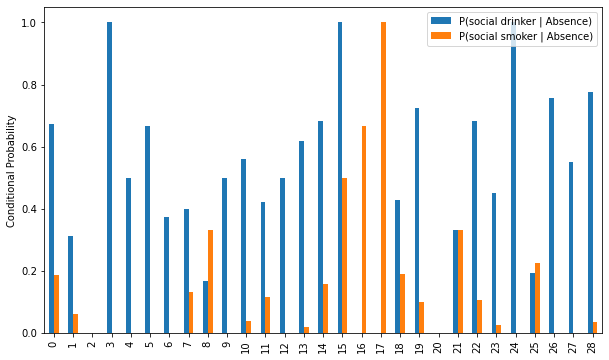

In [18]:
#compute conditional probabilities smokers/drinkers
absence_prob = pp_data['Reason for absence'].value_counts(normalize=True)

cond_prob_drinker_smoker = pd.DataFrame(index=range(0,29))
cond_prob_drinker_smoker['P(social drinker | Absence)'] = cond_prob['p(Absence | social drinker)']*drinker_prob/absence_prob
cond_prob_drinker_smoker['P(social smoker | Absence)'] = cond_prob['p(Absence | social smoker)']*smoker_prob/absence_prob

plt.figure()
ax = cond_prob_drinker_smoker.plot.bar(figsize=(10,6))
ax.set_ylabel('Conditional Probability')

plt.savefig('Conditional_probability_smoker_drinker.png')

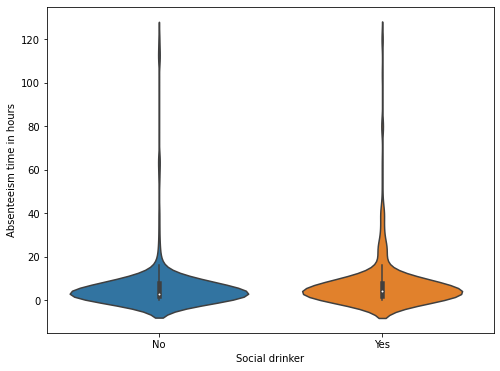

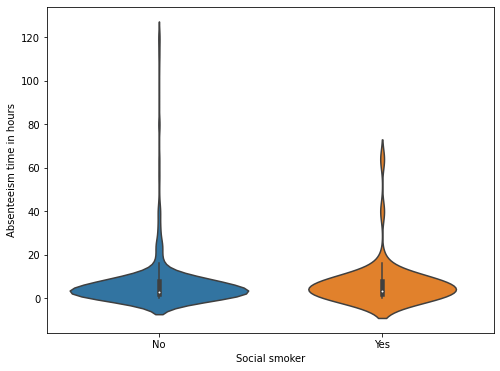

In [19]:
#plot absenteeism time in hours
plt.figure(figsize=(8,6))
sns.violinplot(data=pp_data, x='Social drinker', y='Absenteeism time in hours', order=['No','Yes'])
plt.savefig('drinkers_hour_dist.png')

plt.figure(figsize=(8,6))
sns.violinplot(data=pp_data, x='Social smoker', y='Absenteeism time in hours', order=['No','Yes'])
plt.savefig('smokers_hour_dist.png')

In [20]:
from scipy.stats import ttest_ind

hours_col = 'Absenteeism time in hours'

#test mean absenteeism time for drinkers
hours_drinkers = pp_data.loc[drinker_mask, hours_col]
hours_non_drinkers = pp_data.loc[~drinker_mask, hours_col]
drinkers_test = ttest_ind(hours_drinkers,hours_non_drinkers)
print(f'Statistics value: {drinkers_test[0]}, p-value: {drinkers_test[1]}')

Statistics value: 1.7713833295243993, p-value: 0.07690961828294651


In [21]:
#test mean absenteeism time for smokers
hours_col = 'Absenteeism time in hours'

hours_smokers = pp_data.loc[smoker_mask, hours_col]
hours_non_smokers = pp_data.loc[~smoker_mask, hours_col]
smokers_test = ttest_ind(hours_smokers,hours_non_smokers)
print(f'Statistics value: {smokers_test[0]}, p-value: {smokers_test[1]}')

Statistics value: -0.24277795417700243, p-value: 0.8082448720154971


In [22]:
#preform kolmogorov-smirnov test
from scipy.stats import ks_2samp

ks_drinkers = ks_2samp(hours_drinkers, hours_non_drinkers)
ks_smokers = ks_2samp(hours_smokers, hours_non_smokers)

print(f'Drinkers comparison: statistics={ks_drinkers[0]:.03f}, p-value={ks_drinkers[1]:.03f}')
print(f'Smokers comparison: statistics={ks_smokers[0]:.03f}, p-value={ks_smokers[1]:.03f}')

Drinkers comparison: statistics=0.135, p-value=0.002
Smokers comparison: statistics=0.104, p-value=0.607


In [23]:
# define function for computing the BMI category
def get_bmi_category(bmi):
    if bmi < 18.5:
        category = 'underweight'
    elif bmi >= 18.5 and bmi < 25:
        category = 'healthy weight'
    elif bmi >= 25 and bmi < 30:
        category = 'overweight'
    else:
        category = 'obese'
    return category

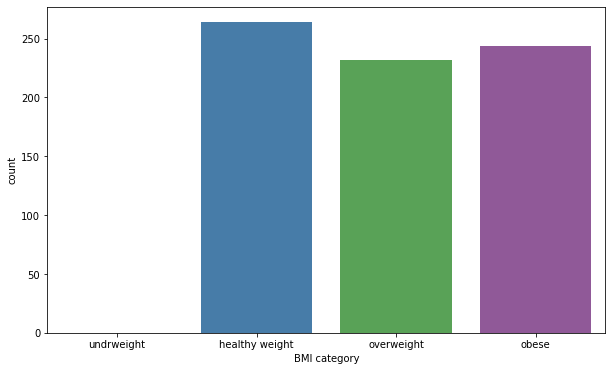

In [24]:
#compute bmi category
pp_data['BMI category'] = pp_data['Body mass index'].apply(get_bmi_category)
#plot entry count for each category
plt.figure(figsize=(10,6))
sns.countplot(data=pp_data, x='BMI category', order=['undrweight','healthy weight','overweight','obese'], palette='Set1')
plt.savefig('bmi_categories.png')

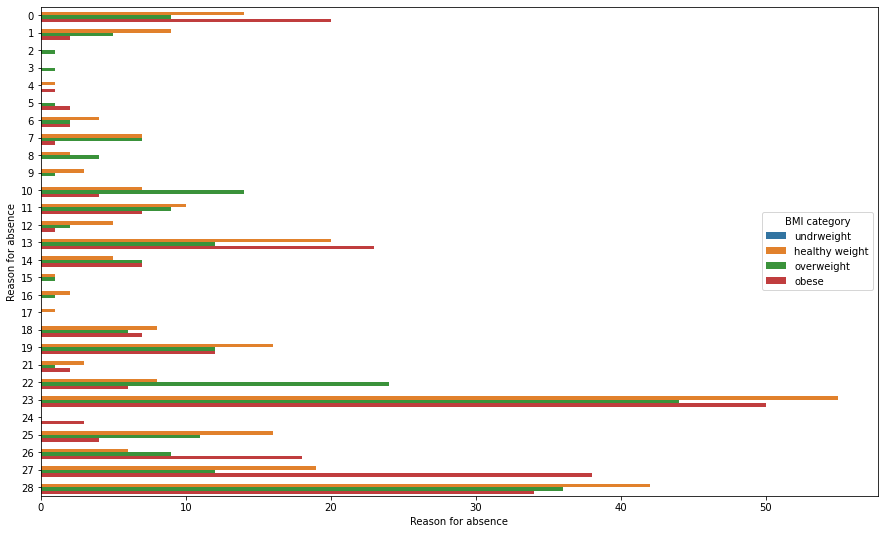

In [25]:
#plot BMI category vs reason for absence
plt.figure(figsize=(15,9))
ax = sns.countplot(data=pp_data, y='Reason for absence', hue='BMI category', hue_order=['undrweight','healthy weight','overweight','obese'])
ax.set_xlabel('Reason for absence')
plt.savefig('reasons_bmi.png')

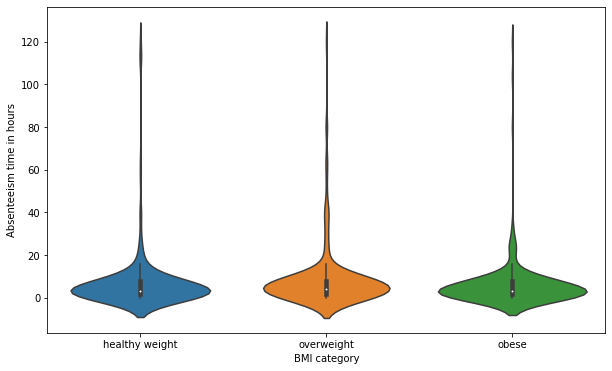

In [26]:
#plot distribution of absence time
plt.figure(figsize=(10,6))
sns.violinplot(data=pp_data, x='BMI category', y='Absenteeism time in hours', order=['healthy weight', 'overweight', 'obese'])
plt.savefig('bmi_hour_disterbution.png')

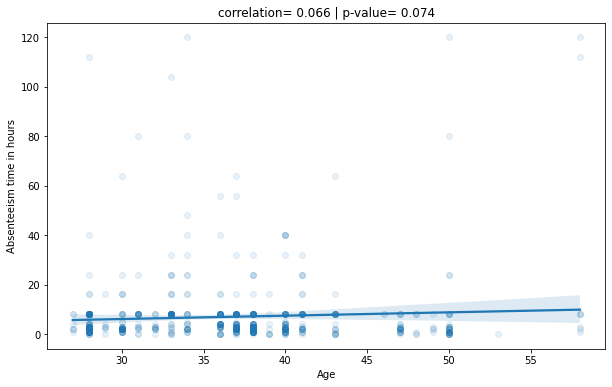

In [27]:
from scipy.stats import pearsonr

#compute pearson's corelation coefficient and p-value
pearson_test = pearsonr(pp_data['Age'], pp_data['Absenteeism time in hours'])
#plot age vs absenteeism time
plt.figure(figsize=(10,6))
ax = sns.regplot(data=pp_data, x='Age', y='Absenteeism time in hours', scatter_kws={'alpha':0.1})
ax.set_title(f'correlation= {pearson_test[0]:0.3f} | p-value= {pearson_test[1]:.03f}')
plt.savefig('correlation_age_hour.png')

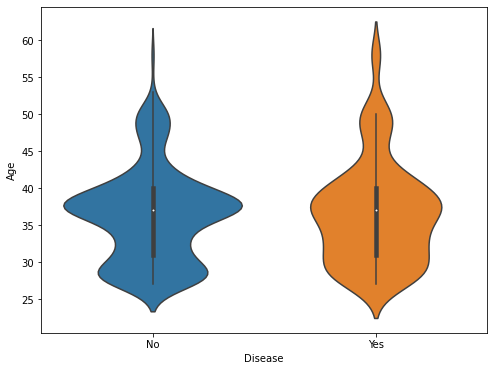

In [28]:
#plot age vs disease
plt.figure(figsize=(8,6))
sns.violinplot(data=pp_data, x='Disease', y='Age')
plt.savefig('age_disease.png')

In [29]:
# get age entries for employees with disease
disease_mask = pp_data['Disease'] =='Yes'
disease_ages = pp_data['Age'][disease_mask]
no_disease_ages = pp_data['Age'][~disease_mask]
#perform t-test
test_res = ttest_ind(disease_ages, no_disease_ages)
print(f'Test for euality of means: statistic= {test_res[0]:.03f}, p-value={test_res[1]:.03f}')
#perform kolmogorov-smirnov test
ks_res = ks_2samp(disease_ages, no_disease_ages)
print(f'KS test for equality of distributions: statistics= {ks_res[0]:.03f}, p-value= {ks_res[1]:.03f}')

Test for euality of means: statistic= 0.630, p-value=0.529
KS test for equality of distributions: statistics= 0.057, p-value= 0.619


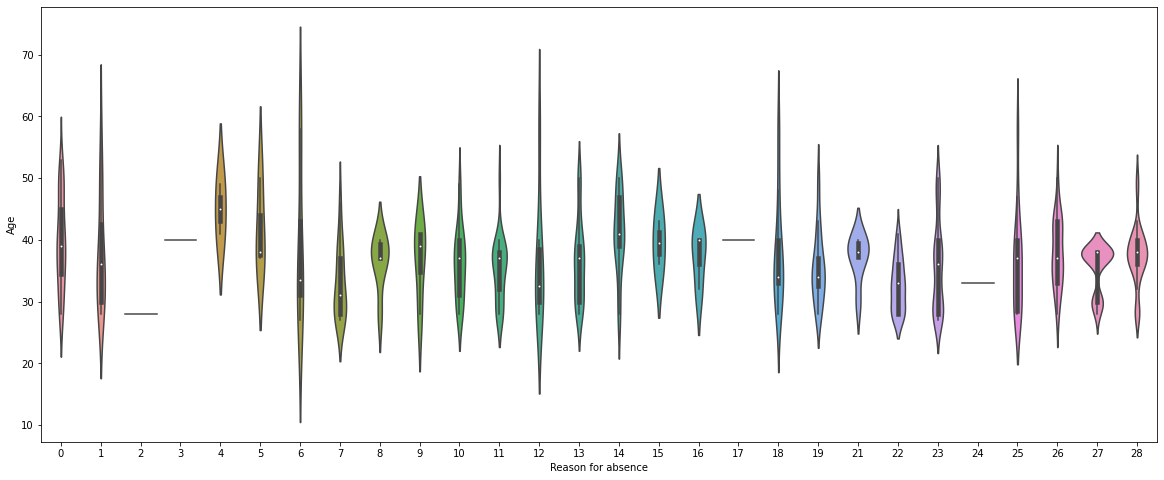

In [30]:
#plot reason for absence vs age
plt.figure(figsize=(20,8))
sns.violinplot(data=pp_data, x='Reason for absence', y='Age')
plt.savefig('age_reson.png')

In [31]:
#compute percentage of employees per education level
education_types = ['high school', 'graduate', 'postgraduate', 'master_phd']
counts = pp_data['Education'].value_counts()
percentages = pp_data['Education'].value_counts(normalize=True)

for edu_type in education_types:
    print(f'Education type: {edu_type:12s} | Counts: {counts[edu_type]:6.0f} | Percentage: {100*percentages[edu_type]:4.1f} %')

Education type: high school  | Counts:    611 | Percentage: 82.6 %
Education type: graduate     | Counts:     46 | Percentage:  6.2 %
Education type: postgraduate | Counts:     79 | Percentage: 10.7 %
Education type: master_phd   | Counts:      4 | Percentage:  0.5 %


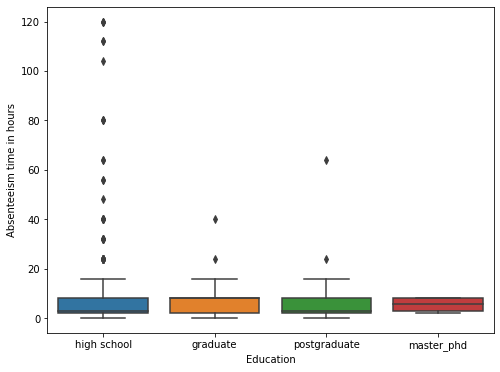

In [32]:
#plot the distribution of absence hours per education level
plt.figure(figsize=(8,6))
sns.boxplot(data=pp_data, x='Education', y='Absenteeism time in hours', order=['high school', 'graduate', 'postgraduate', 'master_phd'])
plt.savefig('education_hours.png')

In [33]:
education_types = ['high school', 'graduate', 'postgraduate', 'master_phd']
for edu_type in education_types:
    mask = pp_data["Education"] == edu_type
    hours = pp_data['Absenteeism time in hours'][mask]
    mean = hours.mean()
    stdev = hours.std()
    print(f'Education type: {edu_type:12s} | Mean: {mean:3.3f} | stdev: {stdev:3.3f}')

Education type: high school  | Mean: 7.190 | stdev: 14.259
Education type: graduate     | Mean: 6.391 | stdev: 6.754
Education type: postgraduate | Mean: 5.266 | stdev: 7.963
Education type: master_phd   | Mean: 5.250 | stdev: 3.202


<AxesSubplot:xlabel='count', ylabel='Reason for absence'>

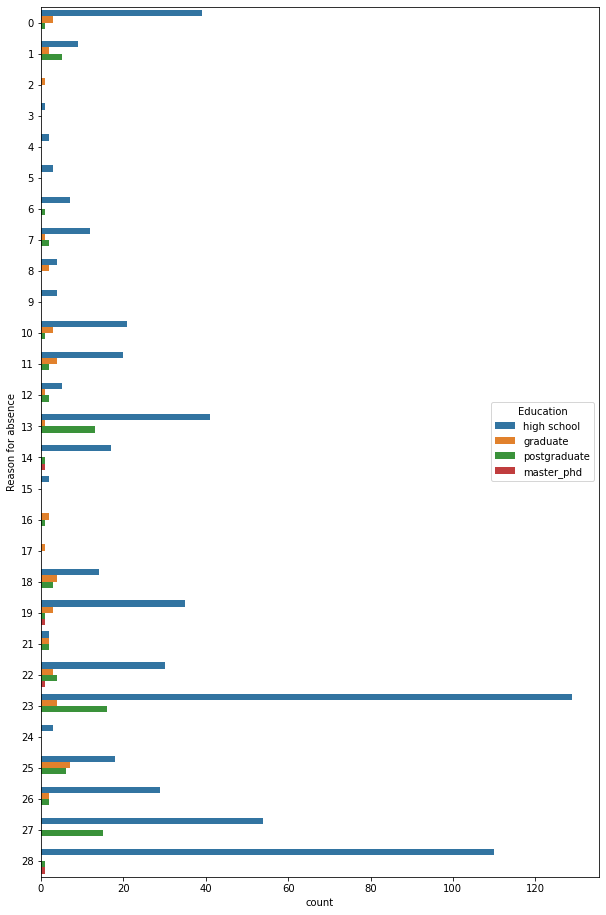

In [34]:
#plot reason for absence per education level
plt.figure(figsize=(10,16))
sns.countplot(data=pp_data, y="Reason for absence", hue="Education", hue_order=['high school', 'graduate', 'postgraduate', 'master_phd'])

In [35]:
#define threashold for exteeme hours of absenteeism and compute probability of extreme abcence per education level
threashold = 40
total_entries = len(pp_data)
high_school_mask = pp_data['Education'] == 'high school'

extreme_mask = pp_data['Absenteeism time in hours'] > threashold

prob_hs = len(pp_data[high_school_mask])/total_entries
prob_grad = len(pp_data[~high_school_mask])/total_entries

prob_extreme_hs = len(pp_data[high_school_mask & extreme_mask])/total_entries
prob_extreme_grad = len(pp_data[~high_school_mask & extreme_mask])/total_entries

cond_prob_extreme_hs = prob_extreme_hs/prob_hs
cond_prob_extreme_grad = prob_extreme_grad/prob_grad

print(f'P(extreme absence) | degree = high school = {100*cond_prob_extreme_hs:.02f} %')
print(f'P(extreme absence) | degree != high school = {100*cond_prob_extreme_grad:.02f} %')

P(extreme absence) | degree = high school = 2.29 %
P(extreme absence) | degree != high school = 0.78 %


<Figure size 720x432 with 0 Axes>

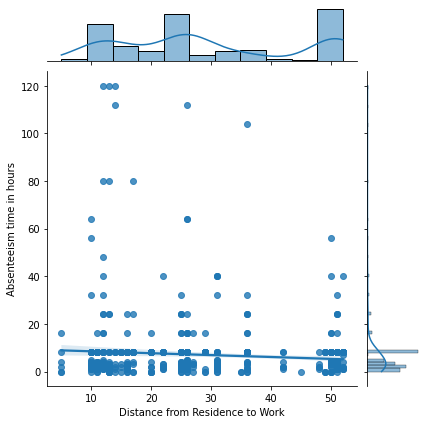

<Figure size 720x432 with 0 Axes>

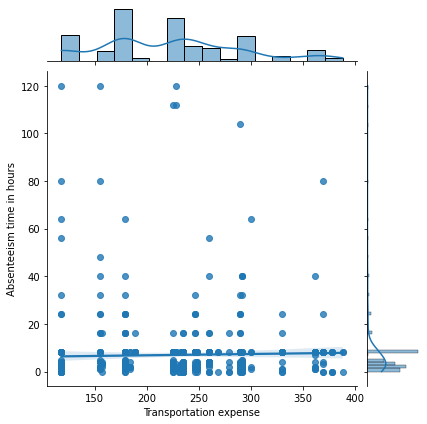

In [36]:
#plot transportation coasts and distance to work vs hours
plt.figure(figsize=(10,6))

sns.jointplot(data=pp_data, x='Distance from Residence to Work', y='Absenteeism time in hours', kind='reg')
plt.savefig('distance_vs_hours.png')

plt.figure(figsize=(10,6))

sns.jointplot(data=pp_data, x='Transportation expense', y='Absenteeism time in hours', kind='reg')
plt.savefig('coasts_vs_hours.png')

<Figure size 720x432 with 0 Axes>

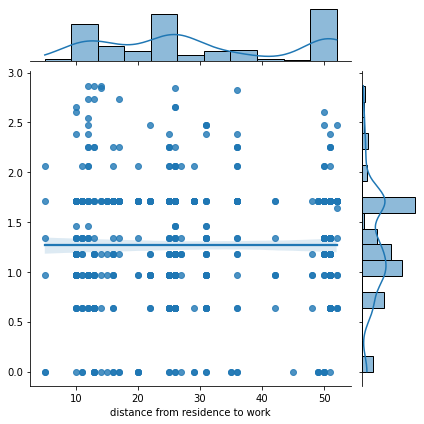

<Figure size 720x432 with 0 Axes>

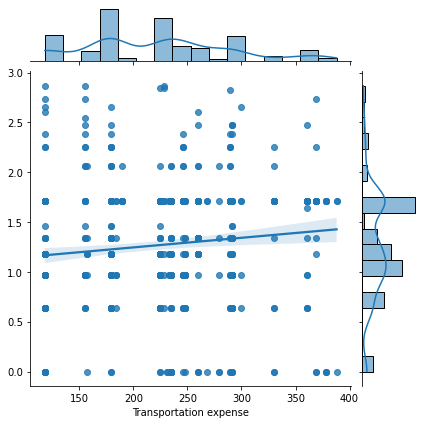

In [37]:
#run yeo-jhonson transformationand recreate previus plots
from scipy.stats import yeojohnson

hours = yeojohnson(pp_data['Absenteeism time in hours'].apply(float))
distances = pp_data['Distance from Residence to Work']
expenses = pp_data['Transportation expense']

plt.figure(figsize=(10,6))

ax = sns.jointplot(x=distances, y=hours[0], kind='reg')
ax.set_axis_labels('distance from residence to work')
plt.savefig('distance_vs_hours_transformed.png')

plt.figure(figsize=(10,6))

ax = sns.jointplot(x=expenses, y=hours[0], kind='reg')
ax.set_axis_labels('Transportation expense')
plt.savefig('coasts_vs_hours_transformed.png')

<Figure size 720x432 with 0 Axes>

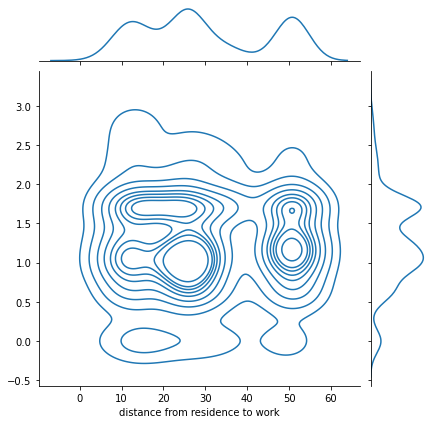

<Figure size 720x432 with 0 Axes>

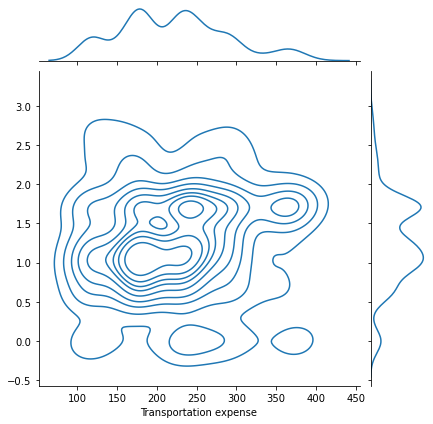

In [38]:
#produce KDE plot of distance and expenses vs hour
plt.figure(figsize=(10,6))

ax = sns.jointplot(x=distances, y=hours[0], kind='kde')
ax.set_axis_labels('distance from residence to work')
plt.savefig('distance_vs_hours_transformed_kde.png')

plt.figure(figsize=(10,6))

ax = sns.jointplot(x=expenses, y=hours[0], kind='kde')
ax.set_axis_labels('Transportation expense')
plt.savefig('coasts_vs_hours_transformed_kde.png')

In [39]:
#perform pearson test
distance_corr = pearsonr(hours[0], distances)
expenses_corr = pearsonr(hours[0], expenses)

print(f'Distance correlation: corr= {distance_corr[0]:.03f}, p-value= {distance_corr[1]:.03f}')
print(f'expense correlation: corr= {expenses_corr[0]:.03f}, p-value= {expenses_corr[1]:.03f}')

Distance correlation: corr= -0.000, p-value= 0.999
expense correlation: corr= 0.113, p-value= 0.002


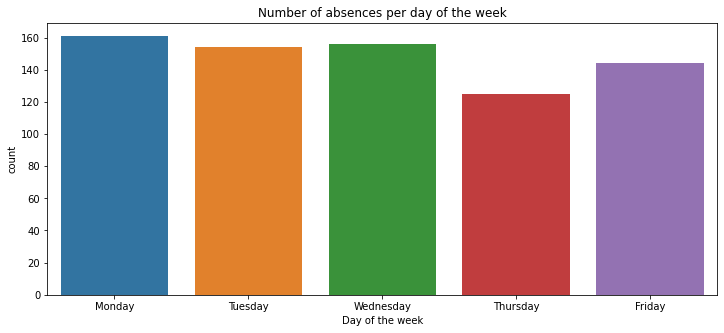

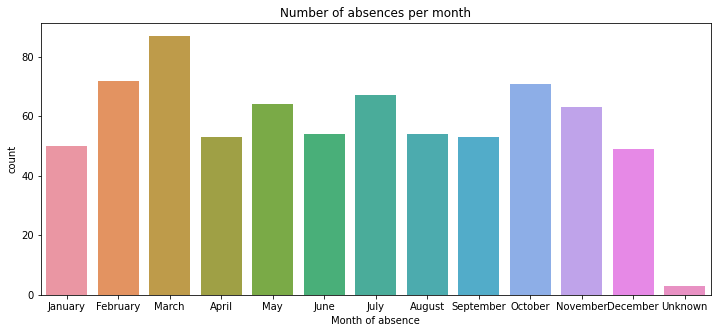

In [40]:
#count absences per day of the week
plt.figure(figsize=(12,5))
ax = sns.countplot(data=pp_data, x='Day of the week', order=['Monday','Tuesday','Wednesday','Thursday','Friday'])
ax.set_title('Number of absences per day of the week')
plt.savefig('day_counts.png')

plt.figure(figsize=(12,5))
ax = sns.countplot(data=pp_data, x='Month of absence', order=["January","February","March","April","May","June","July","August","September","October","November","December","Unknown"])
ax.set_title('Number of absences per month')
plt.savefig('month_counts.png')

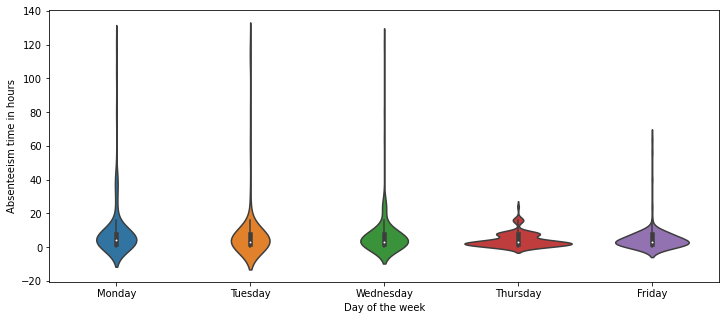

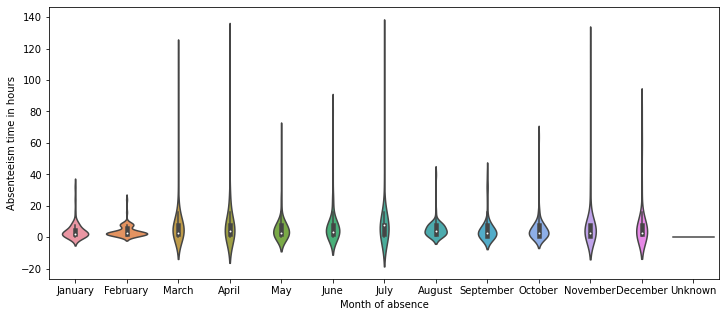

In [41]:
#plot distribution of ansence hours
plt.figure(figsize=(12,5))
sns.violinplot(data=pp_data, x='Day of the week', y='Absenteeism time in hours', order=['Monday','Tuesday','Wednesday','Thursday','Friday'])
plt.savefig('day_hours.png')

plt.figure(figsize=(12,5))
sns.violinplot(data=pp_data, x='Month of absence', y='Absenteeism time in hours', order=["January","February","March","April","May","June","July","August","September","October","November","December","Unknown"])
plt.savefig('day_hours.png')

In [42]:
#compute mean and standard deviation of absence hours per day of the week
dows = ['Monday','Tuesday','Wednesday','Thursday','Friday']

for day in dows:
    mask = pp_data["Day of the week"] == day
    hours = pp_data["Absenteeism time in hours"][mask]
    mean = hours.mean()
    stdev = hours.std()
    print(f'Day of the week: {day:10s} | Mean: {mean:.03f} | Stdev: {stdev:.03f}')

Day of the week: Monday     | Mean: 9.248 | Stdev: 15.973
Day of the week: Tuesday    | Mean: 7.981 | Stdev: 18.027
Day of the week: Wednesday  | Mean: 7.147 | Stdev: 13.268
Day of the week: Thursday   | Mean: 4.424 | Stdev: 4.266
Day of the week: Friday     | Mean: 5.125 | Stdev: 7.911


In [43]:
#compute mean and standard deviation of absence hours per month
months = ["January","February","March","April","May","June","July","August","September","October","November","December","Unknown"]
for month in months:
    mask = pp_data["Month of absence"] == month
    hours = pp_data["Absenteeism time in hours"][mask]
    mean = hours.mean()
    stdev = hours.std()
    print(f'Month: {month:10s} | Mean: {mean:8.03f} | Stdev: {stdev:.03f}')

Month: January    | Mean:    4.440 | Stdev: 5.786
Month: February   | Mean:    4.083 | Stdev: 3.710
Month: March      | Mean:    8.793 | Stdev: 16.893
Month: April      | Mean:    9.094 | Stdev: 18.024
Month: May        | Mean:    6.250 | Stdev: 10.314
Month: June       | Mean:    7.611 | Stdev: 12.359
Month: July       | Mean:   10.955 | Stdev: 21.547
Month: August     | Mean:    5.333 | Stdev: 5.749
Month: September  | Mean:    5.509 | Stdev: 8.407
Month: October    | Mean:    4.915 | Stdev: 8.055
Month: November   | Mean:    7.508 | Stdev: 16.121
Month: December   | Mean:    8.449 | Stdev: 16.049
Month: Unknown    | Mean:    0.000 | Stdev: 0.000


In [44]:
#perform t-test for average duration diffrence
thursday_mask = pp_data['Day of the week'] == 'Thursday'
july_mask = pp_data['Month of absence'] == 'July'

thursday_data = pp_data['Absenteeism time in hours'][thursday_mask]
no_thursday_data = pp_data['Absenteeism time in hours'][~thursday_mask]
july_data = pp_data['Absenteeism time in hours'][july_mask]
no_july_data = pp_data['Absenteeism time in hours'][~july_mask]

thursday_res = ttest_ind(thursday_data, no_thursday_data)
july_res = ttest_ind(july_data, no_july_data)

print(f'Thursday test results: statistics= {thursday_res[0]:.03f}, pvalue= {thursday_res[1]:.03f}')
print(f'july test results: statistics= {july_res[0]:.03f}, pvalue= {july_res[1]:.03f}')

Thursday test results: statistics= -2.307, pvalue= 0.021
july test results: statistics= 2.605, pvalue= 0.009


<AxesSubplot:>

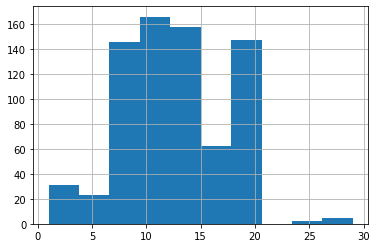

In [45]:
pp_data.head().T
pp_data['Service time'].hist()